![imgdiagram](images/PvVDiag.png)

Liquid-Vapour Two Phase Region: Coexistence of liquid and vapour, encapsulated between dewpoint and bubble point line.

Vapour Region: Between Dew Point and Critical Temperature (Tc) Isotherm, where our substamce is in the gas phase but below the critical temperature

Dashed line represents the critical pressure



# Ideal Gas Law

## Assumptions:
 - Volume occupied by gas molecules is negligible
 - There is no intermolecular attraction or repulsion between the gas molecules

## Limitations:
 - Unreliable at low temperatures and/or high pressures
 - Cannot predict vapour-liquid coexistence

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Constant Values
R = 8.314 # cm^3 MPa / K mol
list_of_volumes = [i for i in range(30, 601, 1)]
list_of_temperatures = [255.2, 265.1, 274.4, 284.0, 294.4, 304.1, 334.1,354.1]

In [6]:
critical_pressure = 7.377 # MPa
critical_volume = 94.120 # cm^3 / mol
critical_temperature = 304.128 # K

In [7]:
def ideal_gas_law(gas_constant, list_of_volumes, list_of_temperatures):
    df = pd.DataFrame(columns = [str(i) for i in list_of_temperatures], index = list_of_volumes)

    for index, rows in df.iterrows():
        for column in df:
            df[column][index] = (float(column) * gas_constant) / index

    return df

In [8]:
ideal_gas_df = ideal_gas_law(R, list_of_volumes, list_of_temperatures)

In [9]:
ideal_gas_df

,255.2,265.1,274.4,284.0,294.4,304.1,334.1,354.1
30,70.724427,73.468047,76.045387,78.705867,81.588053,84.276247,92.590247,98.132913
31,68.442994,71.09811,73.59231,76.166968,78.956181,81.557658,89.603465,94.967335
32,66.30415,68.876294,71.29255,73.78675,76.4888,79.008981,86.803356,91.999606
33,64.294933,66.789133,69.13217,71.550788,74.170958,76.61477,84.172952,89.211739
34,62.403906,64.824747,67.098871,69.446353,71.989459,74.361394,81.697276,86.587865
...,...,...,...,...,...,...,...,...
596,3.559954,3.698056,3.827788,3.961705,4.106781,4.242093,4.660583,4.939576
597,3.553991,3.691862,3.821376,3.955069,4.099902,4.234987,4.652776,4.931302
598,3.548048,3.685688,3.814986,3.948455,4.093046,4.227905,4.644996,4.923056
599,3.542125,3.679535,3.808617,3.941863,4.086213,4.220847,4.637241,4.914837


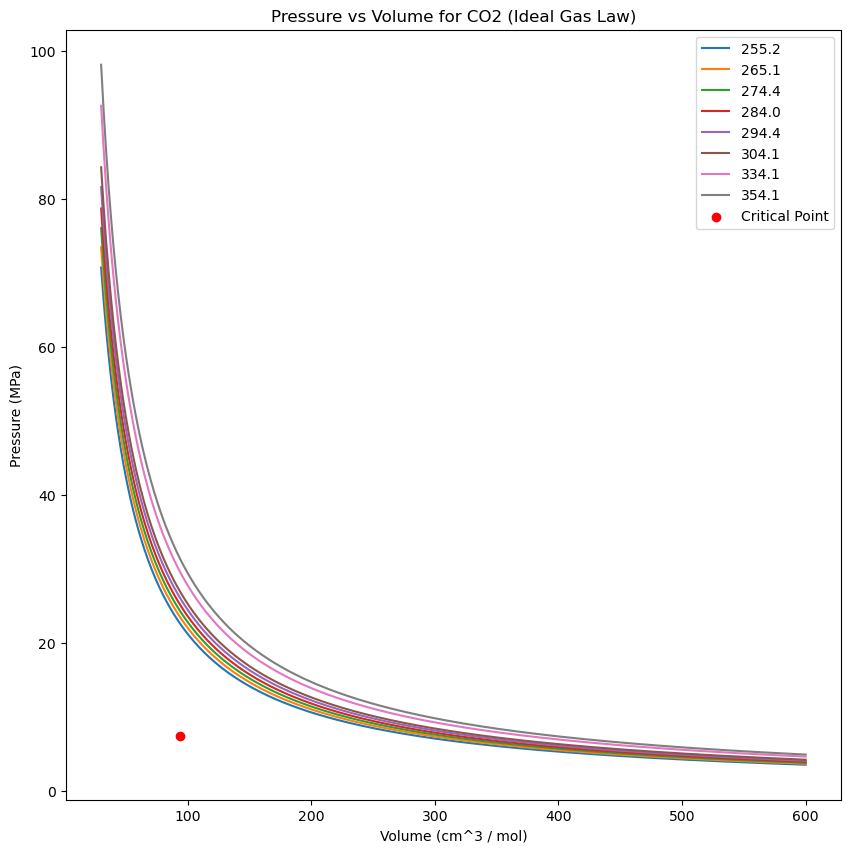

In [10]:
# Plot each column of the dataframe as a line on the same plot with index as x-axis and pressure as y-axis
plt.figure(figsize = (10, 10))
for column in ideal_gas_df:
    plt.plot(ideal_gas_df.index, ideal_gas_df[column], label = column)
plt.xlabel('Volume (cm^3 / mol)')
plt.ylabel('Pressure (MPa)')


#Plot the critical point as a red dot
plt.scatter(critical_volume, critical_pressure, color = 'red', label = 'Critical Point')


plt.title('Pressure vs Volume for CO2 (Ideal Gas Law)')
plt.legend()
plt.show()

Critical Point is for Co2 - Isotherm goes nowhere near it

# Peng-Robinson Equation of State

![image](images/preos.png)

Omega {w} = accentric factor, shape of the molecule. Completely spherical is 0, most noble gases

In [11]:
# Accentric factor is usually from literature
w = 0.224
kappa = 0.37464 + 1.54226 * w - 0.26992 * w**2
alpha = lambda T: (1 + kappa * (1 - (T / critical_temperature)**0.5))**2

In [12]:
bc = 0.07780 * R * critical_temperature / critical_pressure
print(bc)

26.666513614965435


In [13]:
ac = 0.45724 * R**2 * critical_temperature**2 / critical_pressure
print(ac)

396275.55680960533


In [14]:
def peng_rob(gas_constant, list_of_volumes, list_of_temperatures,w, kappa, bc, ac):
    df = pd.DataFrame(columns = [str(i) for i in list_of_temperatures], index = list_of_volumes)
    temperature_aT = { T : (ac * (alpha(T))) for T in list_of_temperatures}
    for index, rows in df.iterrows():
        for column in df:
            df[column][index] = ((gas_constant * float(column)) / (index - bc)) - (temperature_aT[float(column)]/((index*(index+bc) + bc*(index-bc))))

    return df

In [15]:
preos_df = peng_rob(gas_constant=R, list_of_volumes=list_of_volumes, list_of_temperatures=list_of_temperatures, w=w, kappa=kappa, bc=bc, ac=ac)


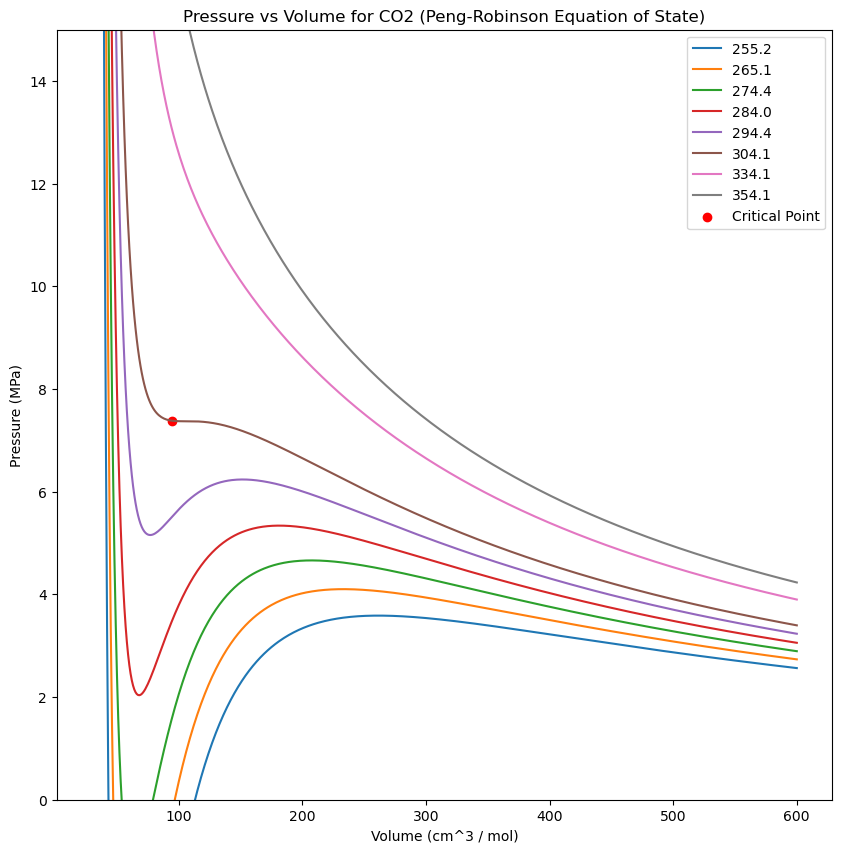

In [16]:
# Plot preos_df, each column of the dataframe as a line on the same plot with index as x-axis and pressure as y-axis, reduce y axis from 0 to 15
# Plot the critical point as a red dot
plt.figure(figsize = (10, 10))
for column in preos_df:
    plt.plot(preos_df.index, preos_df[column], label = column)
plt.xlabel('Volume (cm^3 / mol)')
plt.ylabel('Pressure (MPa)')
plt.ylim(0, 15)
plt.title('Pressure vs Volume for CO2 (Peng-Robinson Equation of State)')
plt.scatter(critical_volume, critical_pressure, color = 'red', label = 'Critical Point')

plt.legend()
plt.show()


In [17]:
# Find critical point for Peng-Robinson Equation of State using fsplve
from scipy.optimize import fsolve

Tc = 304.128
Pc = 7.377
R = 8.314
w = 0.224
kappa = 0.37464 + 1.54226 * w - 0.26992 * w**2
alpha = lambda T: (1 + kappa * (1 - (T / Tc)**0.5))**2

bc = 0.07780 * R * Tc / Pc
print(bc)

ac = 0.45724 * R**2 * Tc**2 / Pc
print(ac)


26.666513614965435
396275.55680960533


In [18]:
from scipy.optimize import fsolve

def f(Vc):
    Pc = 7.377 # example value
    R = 8.314 # J/(mol*K)
    Tc = 304.128 # K


    A = ac * Pc / (R * Tc)**2 # calculate A using ac, Pc, R, and Tc
    #print(A)
    B = bc * Pc / (R * Tc) # calculate B using bc, Pc, R, and Tc
    #print(B)

    Z = Pc*Vc/(R*Tc)
    print(Z)
    return 1*Z**3 + (-(1-B))*(Z**2) + (A-3*B**2-2*B) * Z - (A*B-B**2-B**3)

# initial guess for Vc
Vc_guess = 0.1

# solve for Vc when f(Vc) equals 0
Vc_solution = fsolve(f, Vc_guess)

print("Vc =", Vc_solution)

[0.00029175]
[0.00029175]
[0.00029175]
[0.00029175]
[0.02946692]
[0.08781725]
[0.14460107]
[0.18368107]
[0.21428775]
[0.2371007]
[0.25446203]
[0.26762591]
[0.27772322]
[0.28561995]
[0.29210604]
[0.29810179]
[0.30564994]
[0.33179765]
[0.31052141]
[0.31052142]
[0.33969658]
[0.31284225]
[0.32013604]
[0.32269987]
[0.32126178]
[0.32139022]
[0.32137893]
[0.32137903]
[0.32137903]
Vc = [110.15498908]


In [19]:
f(110.16)

0.32139364461915276


8.53852726023785e-09

In [23]:
A = ac * Pc / (R * Tc)**2 

In [25]:
B = bc * Pc / (R * Tc)

In [21]:
import CubicEquationSolver as ces
#1*Z**3 + (-(1-B))*(Z**2) + (A-3*B**2-2*B) * Z - (A*B-B**2-B**3)

In [38]:
Z_roots = ces.solve(1, -0.94805090, 0.23069070, -0.01496327)

In [34]:
T = 284.00 # K
P = 4.6 # MPa

In [39]:
Z_roots

array([0.61016106, 0.10555004, 0.2323398 ])

In [50]:
Vc_root1 = Z_roots[1]* R * T / P
print(f' At Z = {Z_roots[1]}, the Volume is {Vc} cm^3/mol. This is the liquid phase (Plot on graph)')

 At Z = 0.10555004295080034, the Volume is 119.25981783492531 cm^3/mol. This is the liquid phase (Plot on graph)


In [51]:
Vc_root0 = Z_roots[0]* R * T / P
print(f' At Z = {Z_roots[0]}, the Volume is {Vc} cm^3/mol. This is the Vapour phase (Plot on graph)')

 At Z = 0.6101610560175712, the Volume is 119.25981783492531 cm^3/mol. This is the Vapour phase (Plot on graph)


In [52]:
Vc_root2 = Z_roots[2]* R * T / P
print(f' At Z = {Z_roots[2]}, the Volume is {Vc} cm^3/mol. There is no physical meaning (Plot on graph)')

 At Z = 0.2323398010316285, the Volume is 119.25981783492531 cm^3/mol. There is no physical meaning (Plot on graph)


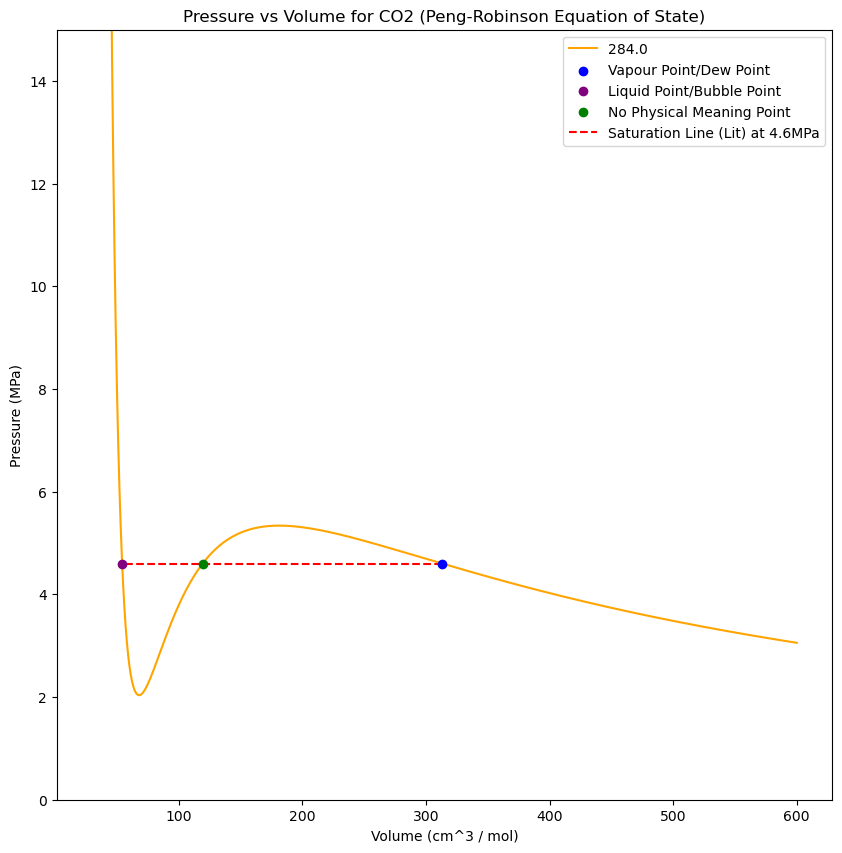

In [67]:
# Plot preos_df, each column of the dataframe as a line on the same plot with index as x-axis and pressure as y-axis, reduce y axis from 0 to 15
# Plot the critical point as a red dot
plt.figure(figsize = (10, 10))
for column in preos_df:
    if column == '284.0':
        plt.plot(preos_df.index, preos_df[column], label = column, color = 'orange')
plt.xlabel('Volume (cm^3 / mol)')
plt.ylabel('Pressure (MPa)')
plt.ylim(0, 15)
plt.title('Pressure vs Volume for CO2 (Peng-Robinson Equation of State)')

# plot the Z_roots and Vc on the same plot and the dot on top of the 284 line

plt.scatter(Vc_root0, P, color = 'blue', label = 'Vapour Point/Dew Point',zorder=3)
plt.scatter(Vc_root1, P, color = 'purple', label = 'Liquid Point/Bubble Point', zorder=3)
plt.scatter(Vc_root2, P, color = 'green', label = 'No Physical Meaning Point', zorder=3)
#Draw a dotted line connecting the roots at P
plt.plot([Vc_root0, Vc_root1], [P, P], color = 'red', linestyle = '--', label = 'Saturation Line (Lit) at 4.6MPa', zorder=2)

plt.legend()
plt.show()

# Mixing Rules

![image](images/mixing_rules.png)

In [68]:
R = 8.314 # J/(mol*K)
T = 233.2 # K
P = 0.1 # MPa

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df_data = pd.read_csv("./Critical_Constants_and_Acentric_Factors.csv")

In [80]:
df_data

,Element,Tc(K),Pc(bar),Vc(cm3/mol),w
0,Argon,150.80,48.70,74.9,0.001
1,Bromine,588.00,103.00,127.2,0.108
2,Chlorine,416.90,79.80,123.8,0.090
3,Fluorine,144.30,52.20,66.3,0.054
4,Helium-4,5.19,2.27,57.4,-0.365
...,...,...,...,...,...
71,1-Propanol,536.80,51.70,219.0,0.623
72,Pyridine,620.00,56.30,254.0,0.243
73,Trichlorotrifluoroethane (Freon 113),487.30,34.10,325.5,0.256
74,Trichlorofluoromethane (Freon 11),471.20,44.10,247.8,0.189


In [72]:
molecules = ['Methane', 'Ethane', 'Propane']

In [73]:
mol_fraction = [0.1, 0.3, 0.6]

In [104]:
# Let's create a table where the molecules are the columns and the rows are the mol_fraction, critical pressure, critical temperature, and acentric factor
df = pd.DataFrame(columns = molecules, index = ['Mol Fraction', 'Critical Pressure (MPa)', 'Critical Temperature (K)', 'Acentric Factor', 'bi', 'ki', 'ai'])
df.loc['Mol Fraction'] = mol_fraction
#Critical Pressure and temperature from df_data using the molecules from the column Element and pressure converting from bar to MPa
df.loc['Critical Pressure (MPa)'] = df_data.loc[df_data['Element'].isin(molecules), 'Pc(bar)'].values * 0.1
df.loc['Critical Temperature (K)'] = df_data.loc[df_data['Element'].isin(molecules), 'Tc(K)'].values
df.loc['Acentric Factor'] = df_data.loc[df_data['Element'].isin(molecules), 'w'].values

# Find bi for each molecule - 0.0778*R*Tc/Pc
df.loc['bi'] = 0.0778 * R * df.loc['Critical Temperature (K)'] / df.loc['Critical Pressure (MPa)']
#Find ki for each molecule - 0.37464 + 1.54226*w - 0.26992*w**2
df.loc['ki'] = 0.37464 + 1.54226 * df.loc['Acentric Factor'] - 0.26992 * df.loc['Acentric Factor']**2
#Find ai which involves alpha ai for each molecule - 0.45724*R**2*Tc**2/Pc * (1 + ki(1 - (T/Tc)**0.5))**2
df.loc['ai'] = 0.45724 * R**2 * df.loc['Critical Temperature (K)']**2 / df.loc['Critical Pressure (MPa)'] * (1 + df.loc['ki'] * (1 - (T/df.loc['Critical Temperature (K)'])**0.5))**2

In [105]:
df

,Methane,Ethane,Propane
Mol Fraction,0.1,0.3,0.6
Critical Pressure (MPa),4.88,4.6,4.25
Critical Temperature (K),305.4,190.4,369.8
Acentric Factor,0.099,0.011,0.153
bi,40.479844,26.773104,56.28175
ki,0.524678,0.391572,0.604287
ai,686683.081716,228701.643792,1285770.861809


## Interactions Parameter
|i, j |Methane    |Ethane |Propane|
|-----|--------|-----|--------|
|Methane|0       |0.00340  |0.01070      |
|Ethane|0.0340       |0  |0.00900      |
|Propane|0.0170       |0.00900  |0      |




In [106]:
df_interaction = pd.DataFrame(columns = molecules, index = molecules)
df_interaction = df_interaction.fillna(0.0)
df_interaction = df_interaction.astype(float)
df_interaction.loc['Methane', 'Methane'] = 0.0
df_interaction.loc['Methane', 'Ethane'] = 0.00340
df_interaction.loc['Methane', 'Propane'] = 0.01070
df_interaction.loc['Ethane', 'Methane'] = 0.00340
df_interaction.loc['Ethane', 'Ethane'] = 0.0
df_interaction.loc['Ethane', 'Propane'] = 0.00900
df_interaction.loc['Propane', 'Methane'] = 0.01070
df_interaction.loc['Propane', 'Ethane'] = 0.00900
df_interaction.loc['Propane', 'Propane'] = 0.0


In [107]:
df_interaction

,Methane,Ethane,Propane
Methane,0.0000,0.0034,0.0107
Ethane,0.0034,0.0000,0.0090
Propane,0.0107,0.0090,0.0000


In [108]:
# Create table of aij using the interaction table and the ai table
df_aij = pd.DataFrame(columns = molecules, index = molecules)
# Formulae for aij - sqrt(ai*aj)*(1 - kij)
for i in molecules:
    for j in molecules:
        df_aij.loc[i, j] = (df.loc['ai', i] * df.loc['ai', j])**0.5 * (1 - df_interaction.loc[i, j])
df_aij


,Methane,Ethane,Propane
Methane,686683.081716,394942.344225,929582.571402
Ethane,394942.344225,228701.643792,537390.626968
Propane,929582.571402,537390.626968,1285770.861809


In [114]:
# Multiple the aij table by the mol_fraction table
df_aij_mol_fraction = pd.DataFrame(columns = molecules, index = molecules)
for i in molecules:
    for j in molecules:
        print (i, j)
        print (df_aij.loc[i, j])
        print (df.loc['Mol Fraction', i])
        print (df.loc['Mol Fraction', j])
        df_aij_mol_fraction.loc[i, j] = df_aij.loc[i, j] * df.loc['Mol Fraction', i] * df.loc['Mol Fraction', j]
df_aij_mol_fraction


Methane Methane
686683.0817162682
0.1
0.1
Methane Ethane
394942.34422541014
0.1
0.3
Methane Propane
929582.5714019976
0.1
0.6
Ethane Methane
394942.34422541014
0.3
0.1
Ethane Ethane
228701.64379200127
0.3
0.3
Ethane Propane
537390.6269677967
0.3
0.6
Propane Methane
929582.5714019976
0.6
0.1
Propane Ethane
537390.6269677967
0.6
0.3
Propane Propane
1285770.861809112
0.6
0.6


,Methane,Ethane,Propane
Methane,6866.830817,11848.270327,55774.954284
Ethane,11848.270327,20583.147941,96730.312854
Propane,55774.954284,96730.312854,462877.510251


In [117]:
# Peng-Robinson Equation of State for a mixture of 3 components
# Sum all values in the aij_mol_fraction table and it will equal a(T)
a = df_aij_mol_fraction.sum().sum()
print(a)

819034.5639398942


In [119]:
# Sum all values in the bi_mol_fraction table and it will equal b(T)
b = (df.loc['bi'] * df.loc['Mol Fraction']).sum()
print(b)

45.84896575534325


### Cubic Equation

m(3) * Z^3 + m(2) * Z^2 + m(1) * Z + m(0) = 0

In [121]:
# Find A and B
A = a * P / (R**2 * T**2)
B = b * P / (R * T)
print(A)
print(B)

0.021788387838798252
0.0023647812713837404


In [127]:
# Find the Z_roots for the mixture
m3 = 1

In [122]:
m2 = -1 - B

In [123]:
m1 = A - 3 * B**2 - 2 * B

In [125]:
m0 = -A * B + B**2 + B**3

In [128]:
print( m3, m2, m1, m0)

1 -1.0023647812713838 0.017042048724646312 -4.591935672607873e-05


In [129]:
Z_roots_mix = ces.solve(m3, m2, m1, m0)

In [130]:
Z_roots_mix

array([0.9851125 , 0.00335386, 0.01389842])

### Finding the fugacity coefficient for all components

In [139]:
# Create table of xi (mole fraction) and  df_aij where mol fraction * aij
df_xi = pd.DataFrame(columns = molecules, index = molecules)
for i in molecules:
    for j in molecules:
        print (i, j)
        print (df.loc['Mol Fraction', i])
        print (df_aij.loc[i, j])
        df_xi.loc[i, j] = df.loc['Mol Fraction', i] * df_aij.loc[i, j]
df_xi



Methane Methane
0.1
686683.0817162682
Methane Ethane
0.1
394942.34422541014
Methane Propane
0.1
929582.5714019976
Ethane Methane
0.3
394942.34422541014
Ethane Ethane
0.3
228701.64379200127
Ethane Propane
0.3
537390.6269677967
Propane Methane
0.6
929582.5714019976
Propane Ethane
0.6
537390.6269677967
Propane Propane
0.6
1285770.861809112


,Methane,Ethane,Propane
Methane,68668.308172,39494.234423,92958.25714
Ethane,118482.703268,68610.493138,161217.18809
Propane,557749.542841,322434.376181,771462.517085


In [171]:
# Sum each column in the df_xi table
df_xi.sum(axis = 0)
df_sum_xi = pd.DataFrame(columns = molecules, index = ['Sum_xi'])
df_sum_xi.loc['Sum_xi'] = df_xi.sum(axis = 0)
df_sum_xi


,Methane,Ethane,Propane
Sum_xi,744900.55428,430539.103741,1025637.962316


In [178]:
# Find the fugacity coefficients for each component at Z root mix 0 and 2
# Column is Z, methan_fug, ethane_fug, propane_fug
# Index is liq_phase, no_physical_meaning, vap_phase
df_fug = pd.DataFrame(columns = [str('Z')] + molecules, index = ['liq_phase', 'no_physical_meaning', 'vap_phase'])

# Column Z is the Z_roots_mix
df_fug.loc['liq_phase', 'Z'] = Z_roots_mix[1]
df_fug.loc['no_physical_meaning', 'Z'] = Z_roots_mix[2]
df_fug.loc['vap_phase', 'Z'] = Z_roots_mix[0]

# Fugacity coefficients for each component at Z root mix 0, using df_sum_xi and df_aij
# 
# Formulae for fugacity coefficients - exp(((bi/b)*(Z-1)) -(log(Z-B)) -(A/(2*sqrt(2)*B))*(2*(df_sum_xi.loc['Sum xi', i])*df_aij.loc[i, i])/a) * LN((Z+ 2.414*B)/(Z-0.414*B))
# 

for i in molecules:
    # Let's break it up for liq_phase
    # First part of the equation
    first_part = (df.loc['bi', i] / b) * (1-df_fug.loc['liq_phase', 'Z'])
    print(first_part)
    # Second part of the equation
    second_part = np.log(df_fug.loc['liq_phase', 'Z'] - B)
    # Third part of the equation
    third_part_1 = A / (2 * 2**0.5 * B)
    third_part_2 = ((2 * df_sum_xi.loc['Sum_xi', i]/a)- (df.loc['bi', i]/b))
    third_part_3 = np.log((df_fug.loc['liq_phase', 'Z'] + 2.414 * B) / (df_fug.loc['liq_phase', 'Z'] - 0.414 * B))
    third_part = third_part_1 * third_part_2 * third_part_3
    # Fugacity coefficient for liq_phase
    df_fug.loc['liq_phase', i] = np.exp(first_part - second_part - third_part)

    # For vap_phase
    # First part of the equation
    first_part = (df.loc['bi', i] / b) * (1-df_fug.loc['vap_phase', 'Z'])
    print(first_part)
    # Second part of the equation
    second_part = np.log(df_fug.loc['vap_phase', 'Z'] - B)
    # Third part of the equation
    third_part_1 = A / (2 * 2**0.5 * B)
    third_part_2 = ((2 * df_sum_xi.loc['Sum_xi', i]/a)- (df.loc['bi', i]/b))
    third_part_3 = np.log((df_fug.loc['vap_phase', 'Z'] + 2.414 * B) / (df_fug.loc['vap_phase', 'Z'] - 0.414 * B))
    third_part = third_part_1 * third_part_2 * third_part_3
    # Fugacity coefficient for vap_phase
    df_fug.loc['vap_phase', i] = np.exp(first_part - second_part - third_part)

0.8799343570732929
0.013144103885122388
0.5819828362969195
0.008693424456215113
1.2234297617004004
0.01827509944881167


In [179]:
df_fug

,Z,Methane,Ethane,Propane
liq_phase,0.003354,41.059377,235.50114,13.084299
no_physical_meaning,0.013898,NaN,NaN,NaN
vap_phase,0.985113,1.009945,1.01591,1.007535


In [177]:
import preos